# Importing Libraries.

In [ ]:
# Numpy
import numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

# ReGex
import re

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

# Problem Statement

* Given dataset that describe the funtionality of houses. Now, nased on features predict the house price.

# Defining the Dataset 

> Link : '/content/drive/MyDrive/Colab_Notebooks/DS_Training_Program_ShapeAI/Housing.csv'

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS Training Program ShapeAI/Housing.csv')

# EDA - Exploratory Data Analysis.

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [ ]:
df.shape[0]

545

In [ ]:
df.shape[1]

13

In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [ ]:
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [ ]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
a = df.copy()

In [ ]:
a.price

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [ ]:
for i in a.price:
  b = len(str(i))
  print(b)

8
8
8
8
8
8
8
8
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7


In [ ]:
df.mainroad.unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df.mainroad.value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [ ]:
# Main road
df.mainroad.replace(['yes','no'],[1,0],inplace=True)

In [ ]:
df.mainroad.value_counts()

1    468
0     77
Name: mainroad, dtype: int64

In [ ]:
df.guestroom.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df.guestroom.value_counts()

no     448
yes     97
Name: guestroom, dtype: int64

In [ ]:
# Guest Room
df.guestroom.replace(['yes','no'],[1,0],inplace=True)

In [ ]:
df.guestroom.value_counts()

0    448
1     97
Name: guestroom, dtype: int64

In [ ]:
df.basement.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df.basement.value_counts()

In [ ]:
# Basement
df.basement.replace(['yes','no'],[1,0],inplace=True)

In [ ]:
df.basement.value_counts()

0    354
1    191
Name: basement, dtype: int64

In [ ]:
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,0,0,no,yes,3,no,furnished


In [ ]:
df.hotwaterheating.value_counts(),df.airconditioning.value_counts(),df.prefarea.value_counts()

(no     520
 yes     25
 Name: hotwaterheating, dtype: int64, no     373
 yes    172
 Name: airconditioning, dtype: int64, no     417
 yes    128
 Name: prefarea, dtype: int64)

In [ ]:
df.hotwaterheating.unique(),df.airconditioning.unique(),df.prefarea.unique()

(array(['no', 'yes'], dtype=object),
 array(['yes', 'no'], dtype=object),
 array(['yes', 'no'], dtype=object))

In [ ]:
for i,j,k in zip(df.hotwaterheating,df.airconditioning,df.prefarea):
  if i,j,k in ['yes','no']:
    repla
    

In [ ]:
df.hotwaterheating.replace(['yes','no'],[1,0],inplace=True)

In [ ]:
df.airconditioning.replace(['yes','no'],[1,0],inplace=True)

In [ ]:
df.prefarea.replace(['yes','no'],[1,0],inplace=True)

In [ ]:
df.furnishingstatus.unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [ ]:
df.furnishingstatus.value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [ ]:
df.furnishingstatus.replace(['unfurnished','semi-furnished','furnished'],[0,1,2],inplace=True)

In [ ]:
df.furnishingstatus.value_counts()

1    227
0    178
2    140
Name: furnishingstatus, dtype: int64

In [ ]:
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2


#### Observations :

1. Data Strength - 545
2. Random Variable - 13
3. None of the columns contain null value
4. Columns with Numerical value : price, area, bedrooms, 	bathrooms, stories, parking. 
5. Columns with Categorical value : mainroad, guestroom, basement	hotwaterheating, airconditioning,prefarea, furnishingstatus

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.930275
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [ ]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,0.150477


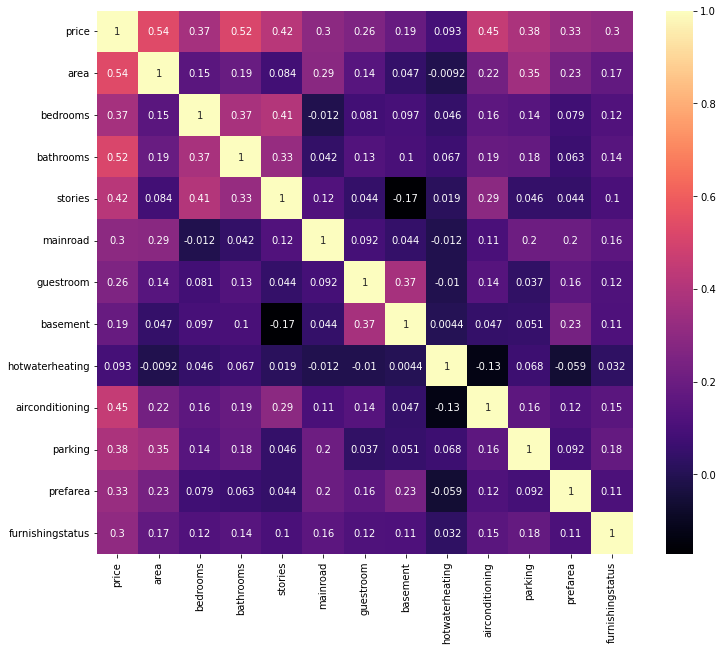

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True,cmap='magma')

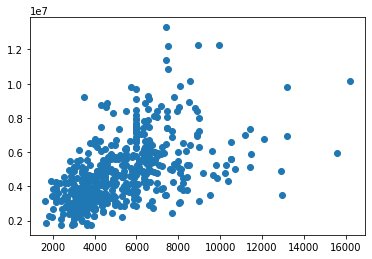

In [ ]:
plt.scatter(df.area, df.price)

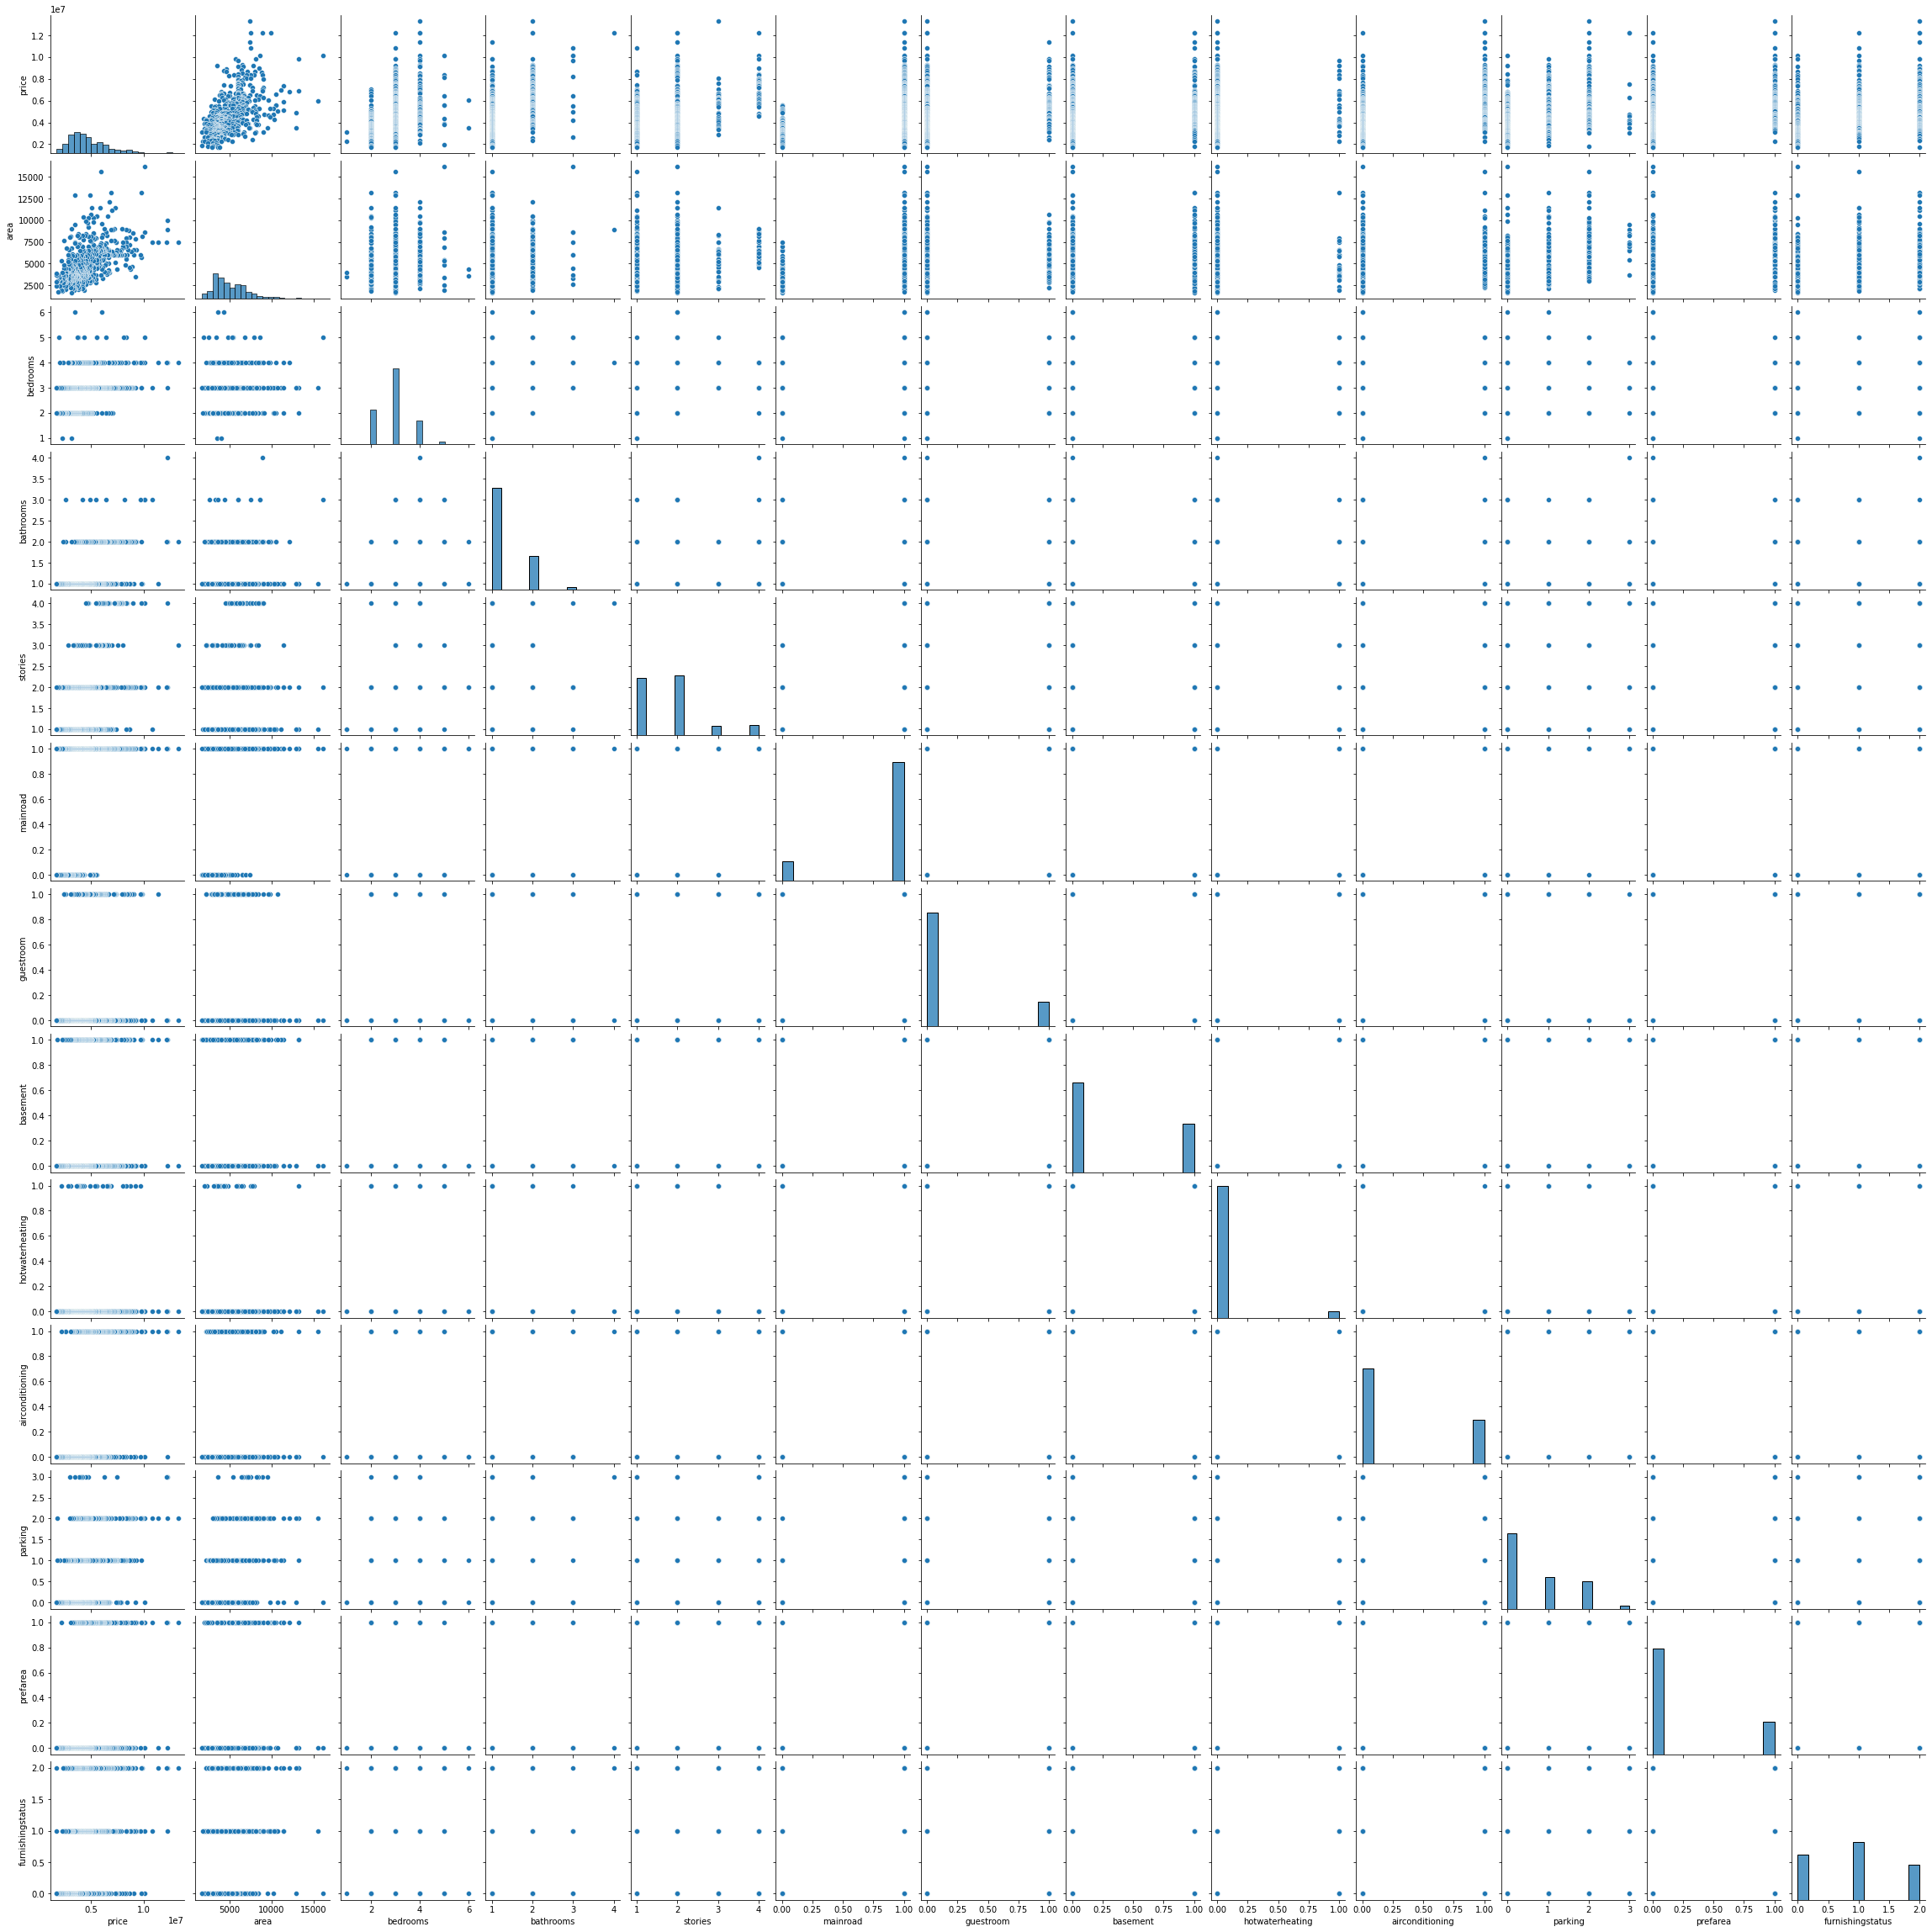

In [ ]:
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


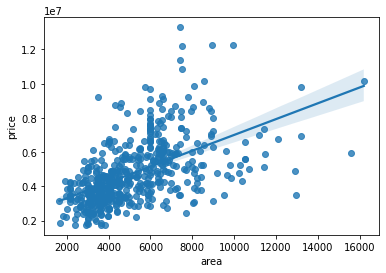

In [ ]:
sns.regplot(df.area, df.price)

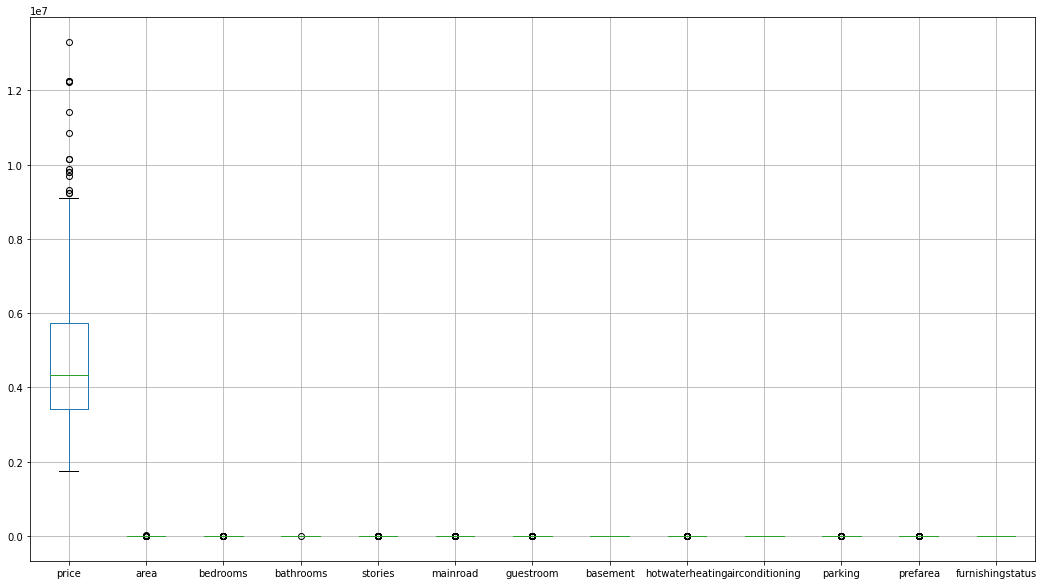

In [ ]:
plt.figure(figsize=(18,10))
df.boxplot()

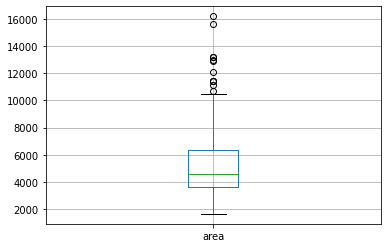

In [ ]:
df[['area']].boxplot()

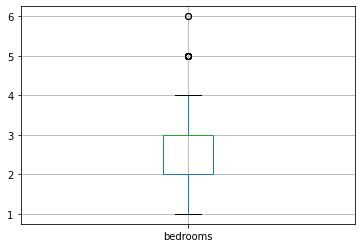

In [ ]:
df[['bedrooms']].boxplot()

In [ ]:
# How many values are there where bedrooms are more than 4 

len(df.bedrooms.loc[df.bedrooms > 4])

12

In [ ]:
df.shape

(545, 13)

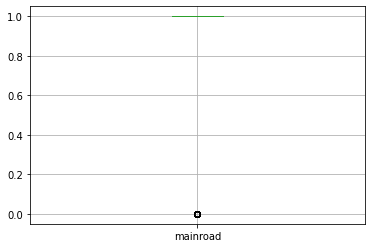

In [ ]:
df[['mainroad']].boxplot()

In [ ]:
len(df.mainroad.loc[df.mainroad == 0])

77

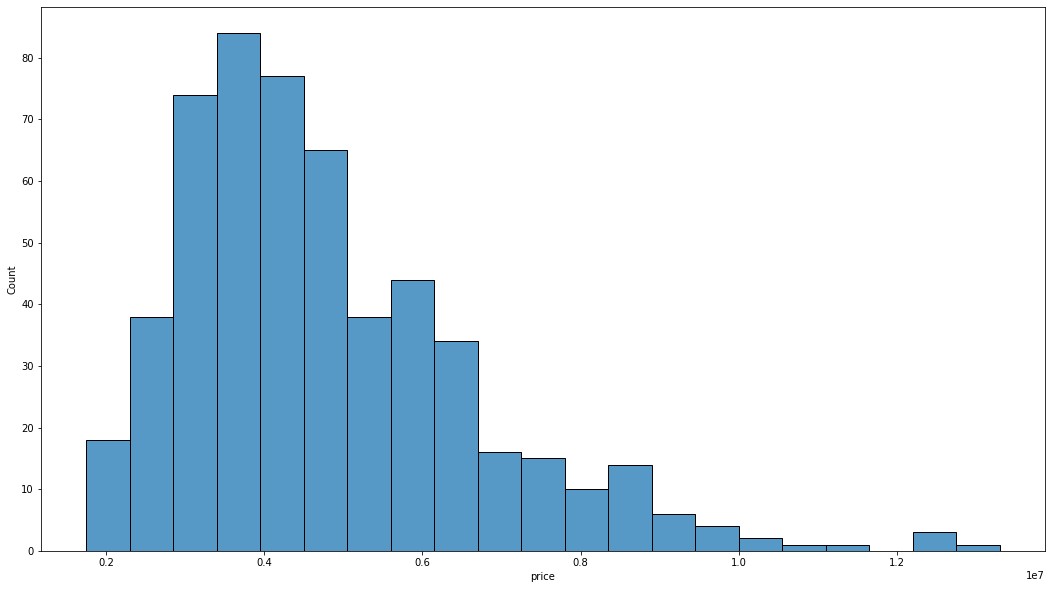

In [ ]:
plt.figure(figsize=(18,10))
sns.histplot(df.price)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


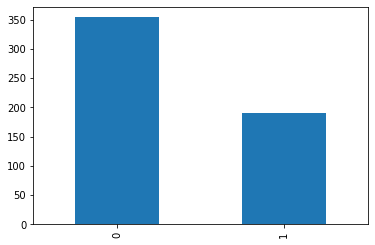

In [ ]:
df.basement.value_counts().plot.bar()

In [ ]:
# What is the price of the house where are 4 bedrooms and 2 bathrooms.

df.loc[df.bedrooms == 4,['price','bedrooms','bathrooms']][df.bathrooms == 2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,price,bedrooms,bathrooms
0,13300000,4,2
3,12215000,4,2
12,9310000,4,2
13,9240000,4,2
16,9100000,4,2
25,8540000,4,2
29,8400000,4,2
32,8295000,4,2
37,7980000,4,2
39,7910000,4,2


In [ ]:
# the above question is a part of data analysis cause the data point we search is already present in dataset. 

In [ ]:
df.loc[df.bedrooms == 4,['price','bedrooms','bathrooms']][df.bathrooms == 2].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,price,bedrooms,bathrooms
count,4.800000e+01,48.0,48.0
mean,6.358990e+06,4.0,2.0
std,2.099179e+06,0.0,0.0
min,2.380000e+06,4.0,2.0
25%,4.893000e+06,4.0,2.0
50%,5.950000e+06,4.0,2.0
75%,7.402500e+06,4.0,2.0
max,1.330000e+07,4.0,2.0


# Manipulation.

#### Spliting the Dataset 
> 80% and 20%

> x_train and x_test -> feature splitting

> y_train and y_test -> target splitting

In [ ]:
df[df.columns[1:]]

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,2
1,8960,4,4,4,1,0,0,0,1,3,0,2
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,2
4,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0,0,2


In [ ]:
df.drop('price',axis=1)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,2
1,8960,4,4,4,1,0,0,0,1,3,0,2
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,2
4,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0,0,2


In [ ]:
x = df.drop('price',axis=1)   # 

y = df.price    #Target dimensiom always 1D

In [ ]:
x.ndim,y.ndim

(2, 1)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
len(x_train),len(x_test)

(436, 109)

In [ ]:
len(y_train),len(y_test)

(436, 109)

#### Chosing the Model

In [ ]:
model = LinearRegression()

#### Fitting/Training

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Intercept value

model.intercept_

-127711.167392442

In [ ]:
# Coefficient value

model.coef_

array([2.35848772e+02, 7.85744924e+04, 1.09711727e+06, 4.06223164e+05,
       3.66824192e+05, 2.33146766e+05, 3.93159779e+05, 6.87881311e+05,
       7.85550579e+05, 2.25756514e+05, 6.29901661e+05, 2.10397118e+05])

* y = c + m(1)x(1) + m(2)x(2).... + m(n)x(n)

#### Predection.

In [ ]:
y_test

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
15     9100000
357    3773000
39     7910000
54     7350000
155    5530000
Name: price, Length: 109, dtype: int64

In [ ]:
pred_y = model.predict(x_test)

In [ ]:
pred_y

array([5203691.70963178, 7257004.02115476, 3062828.59668171,
       4559591.65374424, 3332932.30559782, 3563080.67918997,
       5645466.31219972, 6413979.66873635, 2755831.54819   ,
       2668938.66075228, 9570600.29915353, 2827431.50860062,
       3195686.2583409 , 3352263.99438471, 3713879.49996131,
       5301088.24435749, 2987920.2666968 , 4810799.8212371 ,
       4383031.7048993 , 3525092.18938646, 5796259.50068013,
       5840000.70299301, 2760214.608641  , 4762590.14920608,
       5204755.73895206, 7515542.71619025, 3254681.68956382,
       5236164.45964444, 8178523.16820284, 3434166.15675649,
       6443921.58767581, 3346004.77919184, 6742324.74004133,
       4154936.84088665, 3589152.47491253, 5788125.92515323,
       4768370.18154077, 4391684.04193172, 3217657.04549935,
       4638196.61928878, 4522160.27786714, 3541284.06127245,
       7238136.11941171, 4021515.68926614, 3701978.76822757,
       4298879.55563098, 6705004.0206061 , 3993466.52296897,
       3798185.05328059,

In [ ]:
newdf = pd.DataFrame({'Actual_Value':y_test,'Predicted_Value':pred_y})

In [ ]:
newdf

,Actual_Value,Predicted_Value
316,4060000,5.203692e+06
77,6650000,7.257004e+06
360,3710000,3.062829e+06
90,6440000,4.559592e+06
493,2800000,3.332932e+06
...,...,...
15,9100000,4.933137e+06
357,3773000,4.377133e+06
39,7910000,7.009335e+06
54,7350000,6.351461e+06


Text(0, 0.5, 'Predicted_Value')

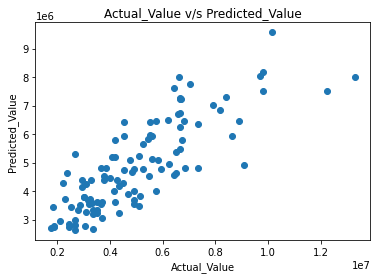

In [ ]:
plt.scatter(newdf.Actual_Value, newdf.Predicted_Value)
plt.title('Actual_Value v/s Predicted_Value')
plt.xlabel('Actual_Value')
plt.ylabel('Predicted_Value')

In [ ]:
newdf.corr()

,Actual_Value,Predicted_Value
Actual_Value,1.00000,0.81839
Predicted_Value,0.81839,1.00000


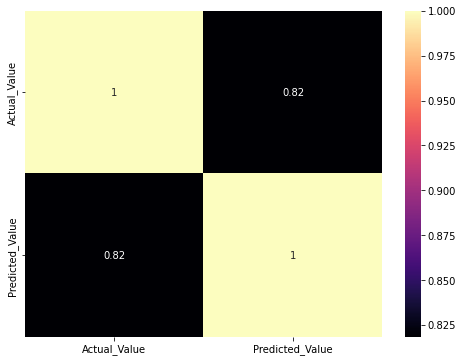

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(newdf.corr(), annot=True,cmap='magma')

In [ ]:
# a, b,... = input('area','bedrooms','bathrooms'.....)
# b = model.predict([a,b,...])
# print(b)

#### Testing the Performance : 

In [ ]:
r2_score(y_test,pred_y)

0.6494754192267804

In [ ]:
r2_score(y_test,pred_y) * 100

64.94754192267804

# Conclusion

In [ ]:
df.area.mean()

5150.54128440367

In [ ]:
df.area.std()

2170.141022508803

In [ ]:
import numpy as np


In [ ]:
inputt=[int(x) for x in "45 32 60".split(' ')]
final=[np.array(inputt)]

In [ ]:
final

[array([45, 32, 60])]